<a href="https://colab.research.google.com/github/LazyHooks/AI_Jobs_Disruption/blob/main/MM_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [31]:
import warnings

warnings.filterwarnings('ignore')

input

In [32]:
df = pd.read_csv("MM_algo.csv")

exploratory

In [33]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Knowledge        717 non-null    int64  
 1   Problem Solving  717 non-null    int64  
 2   Interaction      717 non-null    int64  
 3   Impact           562 non-null    float64
 4   Accountability   717 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 28.1 KB


In [34]:
df.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,118,48,52,90.0,0
1,75,27,27,64.0,0
2,148,27,66,64.0,0
3,52,20,27,90.0,0
4,52,20,27,90.0,0


checks

In [35]:
df.isnull().sum()
df.describe()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
count,717.000000,717.000000,717.000000,562.000000,717.000000
mean,120.747559,48.695955,53.444909,124.170819,30.913529
std,52.977376,21.458083,22.564899,38.904325,17.380021
min,52.000000,20.000000,27.000000,55.000000,0.000000
25%,75.000000,27.000000,36.000000,90.000000,21.000000
50%,103.000000,48.000000,52.000000,116.000000,35.000000
75%,148.000000,65.000000,66.000000,155.000000,42.000000
max,300.000000,150.000000,125.000000,242.000000,75.000000


In [36]:
X=df

Scaling

In [37]:
cols = X.columns

In [38]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [39]:
X = pd.DataFrame(X, columns=[cols])

In [40]:
X.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.266129,0.215385,0.255102,0.187166,0.0
1,0.092742,0.053846,0.000000,0.048128,0.0
2,0.387097,0.053846,0.397959,0.048128,0.0
3,0.000000,0.000000,0.000000,0.187166,0.0
4,0.000000,0.000000,0.000000,0.187166,0.0


In [41]:
X.dropna(inplace=True)
X

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.266129,0.215385,0.255102,0.187166,0.000000
1,0.092742,0.053846,0.000000,0.048128,0.000000
2,0.387097,0.053846,0.397959,0.048128,0.000000
3,0.000000,0.000000,0.000000,0.187166,0.000000
4,0.000000,0.000000,0.000000,0.187166,0.000000
...,...,...,...,...,...
712,0.673387,0.515385,0.224490,0.759358,0.333333
713,0.681452,0.215385,0.397959,0.540107,0.800000
714,0.681452,0.215385,0.397959,0.540107,0.800000
715,0.681452,0.346154,0.397959,1.000000,0.466667


K means

In [42]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [43]:
kmeans.cluster_centers_

array([[0.47909429, 0.33204142, 0.40883046, 0.53918141, 0.52912821],
       [0.16918126, 0.1210647 , 0.26192729, 0.22415625, 0.31443709]])

inertia

In [44]:
kmeans.inertia_

84.31554205667078

Elbow

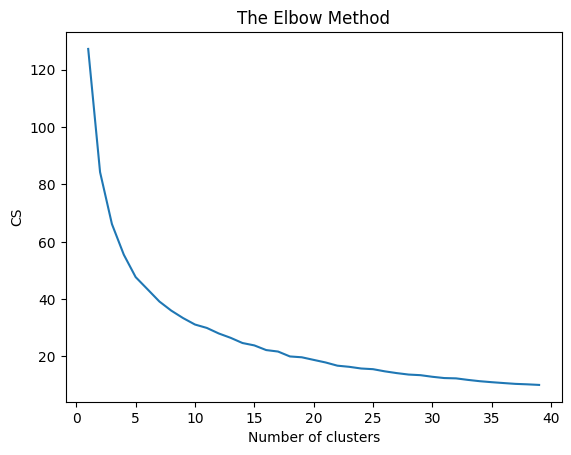

In [45]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

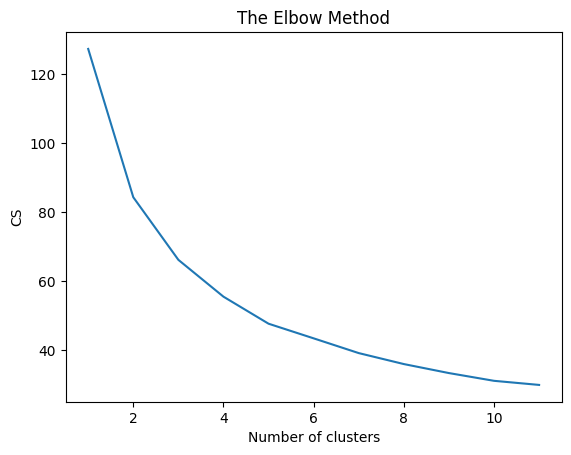

In [46]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [56]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [57]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('jm_algo_l')
print(labels)

[2 4 2 4 4 4 2 2 4 2 4 2 4 4 2 2 2 2 2 2 2 4 4 4 4 4 0 2 4 4 4 4 2 2 2 2 4
 4 0 4 4 2 2 0 0 4 0 2 4 4 2 4 2 2 2 4 2 0 0 4 2 2 2 2 2 4 4 2 4 2 4 0 0 4
 2 0 0 4 2 4 4 0 0 0 0 0 0 4 0 0 2 2 0 0 0 4 4 2 2 2 2 2 2 0 0 4 4 0 0 0 0
 0 0 2 2 0 0 0 0 0 4 0 0 0 0 0 0 0 2 2 0 2 0 0 2 4 0 0 0 0 0 2 2 2 2 2 2 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 0 3 0 0 0 0 0 0 2 3 3 3 0 1 3 3 3 0 0 1 3
 0 0 3 0 3 1 3 1 3 3 1 3 1 1 3 0 1 0 3 1 1 3 1 1 1 3 1 1 3 1 3 2 2 3 1 1 3
 1 1 1 1 0 0 1 3 2 2 2 2 2 4 4 4 4 4 1 4 4 4 4 4 1 4 1 4 4 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 3 1 0 1 4 4 4 0 1 2 1 4 4 4 4 4 4 4 4 4 4 1 4 4 3 0 4 1 1 1
 4 4 1 1 4 4 0 4 1 1 1 4 4 4 4 0 3 3 1 0 0 0 4 0 4 0 4 4 0 0 4 4 4 4 4 4 1
 4 4 4 0 0 0 1 4 4 4 4 4 0 4 4 0 4 0 0 0 0 4 4 1 3 4 4 4 0 0 4 4 0 0 0 4 4
 4 4 0 0 4 4 4 4 4 4 0 0 4 0 4 4 4 4 4 4 0 0 1 4 1 1 3 3 0 0 3 1 0 0 4 3 0
 0 0 0 0 0 0 4 4 1 0 0 0 1 3 1 3 0 0 1 0 0 4 3 3 3 0 1 0 3 0 0 0 3 3 1 0 0
 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 0 1 0 3 1 1 3
 3 3 1 1 0 1 1 0 1 1 1 1 

In [58]:
Z=kmeans.cluster_centers_
Z

array([[ 2.91467837e-01,  2.08284024e-01,  4.77659703e-01,
         3.47467013e-01,  4.33057199e-01],
       [ 6.42449944e-01,  3.28514589e-01,  4.53553835e-01,
         5.31486262e-01,  6.31264368e-01],
       [ 3.06017370e-01,  2.04615385e-01,  4.96703297e-01,
         2.80131633e-01, -4.44089210e-16],
       [ 2.80657021e-01,  4.03280543e-01,  1.39255702e-01,
         6.73560868e-01,  4.55882353e-01],
       [ 8.95777330e-02,  6.15384615e-02,  7.15702948e-02,
         1.63175876e-01,  3.82777778e-01]])

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 562 samples in 0.002s...
[t-SNE] Computed neighbors for 562 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 562 / 562
[t-SNE] Mean sigma: 0.204858
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.252350
[t-SNE] KL divergence after 5000 iterations: 0.251275


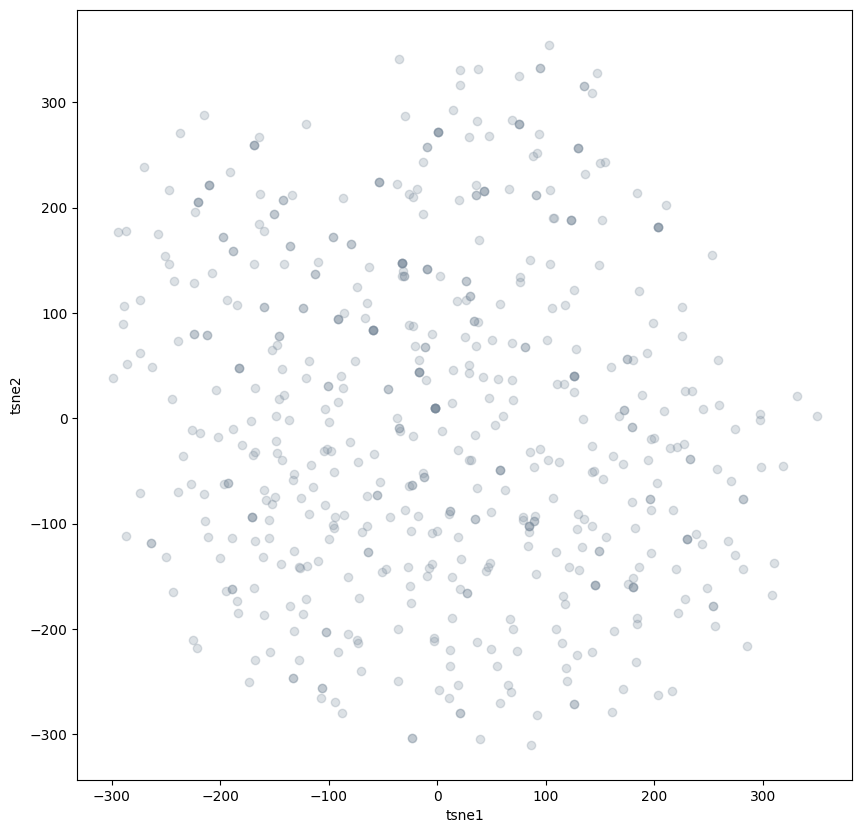

In [59]:

tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [60]:
import matplotlib

In [61]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 562 samples in 0.005s...
[t-SNE] Computed neighbors for 562 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 562 / 562
[t-SNE] Mean sigma: 0.204858
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.868729
[t-SNE] KL divergence after 800 iterations: 0.266512


In [62]:
np.unique(labels)


array([0, 1, 2, 3, 4], dtype=int32)

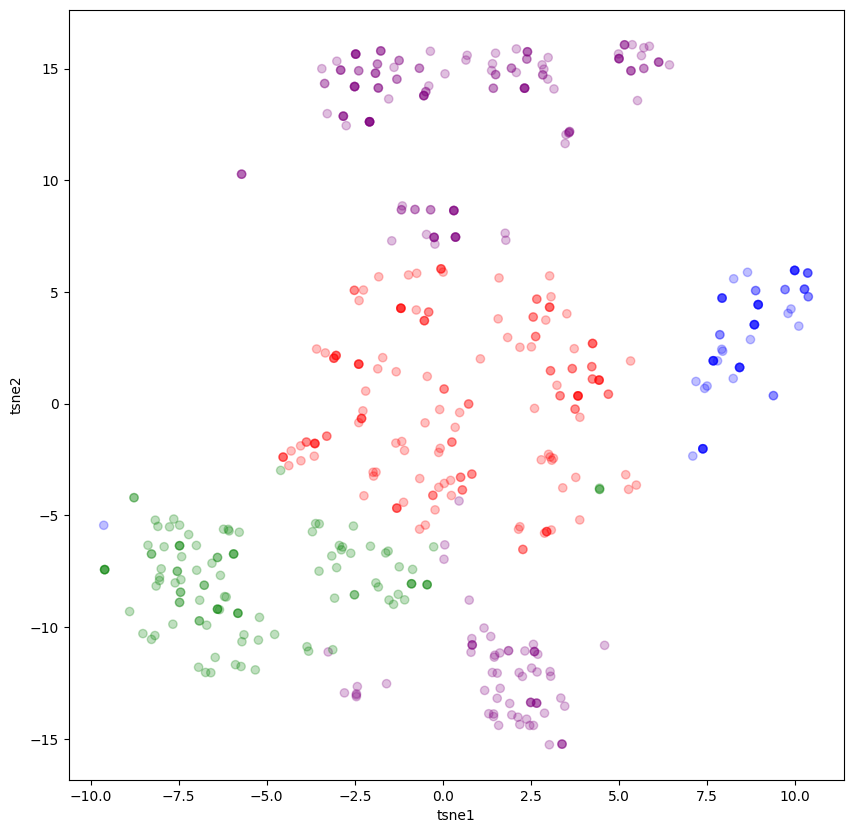

In [63]:
colors = ["red","green","blue","purple"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [64]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('cc_jm_current')
Z2

array([[ 1.24284024e+02,  4.70769231e+01,  7.38106509e+01,
         1.19976331e+02,  3.24792899e+01],
       [ 2.11327586e+02,  6.27068966e+01,  7.14482759e+01,
         1.54387931e+02,  4.73448276e+01],
       [ 1.27892308e+02,  4.66000000e+01,  7.56769231e+01,
         1.07384615e+02, -3.33066907e-14],
       [ 1.21602941e+02,  7.24264706e+01,  4.06470588e+01,
         1.80955882e+02,  3.41911765e+01],
       [ 7.42152778e+01,  2.80000000e+01,  3.40138889e+01,
         8.55138889e+01,  2.87083333e+01]])